# Regresja logistyczna

In [16]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
from sklearn.datasets import make_classification, make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_curve, RocCurveDisplay, auc, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
import time

### Generowanie zbiorów danych

In [17]:
x1, y1 = make_classification(n_samples=2548, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=254448)
x2, y2 = make_moons(n_samples=2548, random_state=254448, shuffle=True)

In [18]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=254448, stratify=y1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=254448, stratify=y2)

In [19]:
class LogisticRegressionImplementation():
    w = None
    
    
    def logit(arg, coefficient):
        val = 1/(1+np.exp((-1)*np.matmul(np.reshape(coefficient, (1,-1)), arg)))
        return val
    
    def log_loss(x, y, w):
        J = 0
        for num in range(len(x)):
            prob  = LogisticRegressionImplementation.logit(x[num], w)
            J = J + y[num]*math.log(prob) + (1-y[num])*math.log(1-prob)
        return -J/(len(x))
    
    def predict_sample(x, w, level=0.5):
        prob = LogisticRegressionImplementation.logit(x, w)
        if prob>=level:
            return 1
        return 0
    
    def fit(self, x, y, eta=0.01, n_iter=9990000, level=0.5, error=0.35, starting_point=1):
        self.level = level
        sample_iter = 0
        n = len(x)
        #dodawanie bias
        x = np.concatenate([np.ones((n, 1)), x], axis=1)
        w = np.array([starting_point for i in range(x.shape[1])])
        for i in range(0,n_iter):
            
            if i%10000 == 0:
                er = LogisticRegressionImplementation.log_loss(x, y, w)
                print(i, ':', er)
                if er<error:
                    print(er)
                    self.w = w
                    return w
                
            sample_iter = i % n
            w = w+eta*(y[sample_iter]-LogisticRegressionImplementation.predict_sample(x[sample_iter].reshape(-1,1),w))*LogisticRegressionImplementation.logit(x[sample_iter], w)*(1-LogisticRegressionImplementation.logit(x[sample_iter], w))*x[sample_iter]
        self.w = w
        return w
    
    def predict(self, x):
        n = len(x)
        x = np.concatenate([np.ones((n, 1)), x], axis=1)
        result = []
        for i in x:
            result.append(LogisticRegressionImplementation.predict_sample(i, self.w, self.level))
        return np.array(result)
    

## Porównanie własnej implementacji z klasyfikatorem z sklearn

### Własny klasyfikator

Zbiór make_classification

In [20]:
log = LogisticRegressionImplementation()
log.fit(x_train1, y_train1, eta=0.00001, error=0.38)

0 : 0.5846201034880085


10000 : 0.5806092171456588
20000 : 0.5765769489829385
30000 : 0.5725567858974909
40000 : 0.5685222104377242
50000 : 0.5644727309155282
60000 : 0.5604897027966513
70000 : 0.5564627559994928
80000 : 0.5524647323165309
90000 : 0.5484682708876943
100000 : 0.5445471662381337
110000 : 0.5406245421664242
120000 : 0.5367522441835231
130000 : 0.5328983040830295
140000 : 0.5291011324104218
150000 : 0.5253483641116865
160000 : 0.5216187919602687
170000 : 0.5178998211872745
180000 : 0.51419630360945
190000 : 0.5105714747227353
200000 : 0.5069420743688291
210000 : 0.5033701056644344
220000 : 0.4998276242090358
230000 : 0.49637507078580695
240000 : 0.49293875416522104
250000 : 0.4896418693729521
260000 : 0.48639675950444156
270000 : 0.48325428319708724
280000 : 0.48019020853040695
290000 : 0.4772555368365921
300000 : 0.4743583574785306
310000 : 0.47155825616707
320000 : 0.46885330348000315
330000 : 0.4662649028207675
340000 : 0.46381172426365175
350000 : 0.46141791357201356
360000 : 0.45913264093970

array([0.40258461, 1.24426791, 0.49045605])

In [21]:
y_pred1 = log.predict(x_test1)

0.8571428571428571

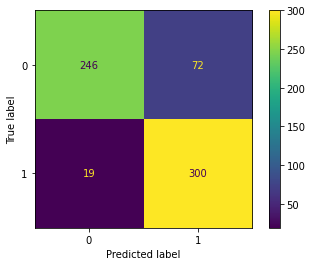

In [22]:
acc1 = accuracy_score(y_test1, y_pred1)
cm1 = confusion_matrix(y_test1, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()

sensitivity = recall_score(y_test1, y_pred1)
specificity = cm1[0][0]/(cm1[0][0]+cm1[0][1])

acc1

In [23]:
log_s = LogisticRegression()
log_s.fit(x_train1,y_train1)
y_pred2 = log_s.predict(x_test1)

0.8932496075353218

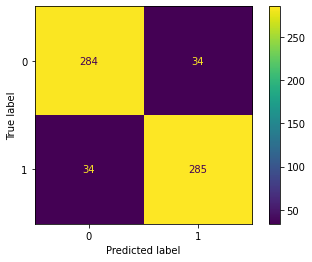

In [24]:
acc2 = accuracy_score(y_test1, y_pred2)
cm2 = confusion_matrix(y_test1, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()


sensitivity2 = recall_score(y_test1, y_pred2)
specificity2 = cm2[0][0]/(cm2[0][0]+cm2[0][1])

acc2

Zbiór make_moons

In [25]:
log_moons = LogisticRegressionImplementation()
log_moons.fit(x_train2, y_train2, eta=0.00005, starting_point=-1, error=0.503)

0 : 1.1299431013431604
10000 : 1.1079115535203143
20000 : 1.0851622491797082
30000 : 1.0618529935546381
40000 : 1.0376832509450082
50000 : 1.0129150660223463
60000 : 0.987268585650931
70000 : 0.9610638945026463
80000 : 0.9339689847823377
90000 : 0.9062198653506766
100000 : 0.8777419195147997
110000 : 0.848622679416249
120000 : 0.8189830980315678
130000 : 0.788802794769402
140000 : 0.7584124002665542
150000 : 0.7278316948492685
160000 : 0.6974813068615483
170000 : 0.6674492210020678
180000 : 0.6404239903892694
190000 : 0.6188385455190749
200000 : 0.6005925935237594
210000 : 0.5848742392891628
220000 : 0.5713129613073292
230000 : 0.5596068382976285
240000 : 0.549577511739611
250000 : 0.5411694172914288
260000 : 0.5341011125150579
270000 : 0.5279528876981906
280000 : 0.5227673034391176
290000 : 0.5185565222793506
300000 : 0.5151902011833456
310000 : 0.5125402987198336
320000 : 0.5102560260486291
330000 : 0.5084154137870347
340000 : 0.5069320829220716
350000 : 0.5057939929084178
360000 : 0

array([ 0.15636798,  0.10365165, -1.0642499 ])

0.8681318681318682

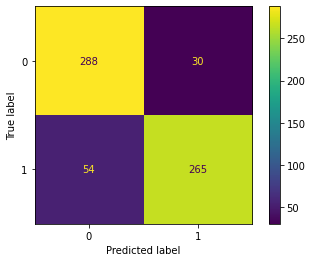

In [26]:
y_pred_moons = log_moons.predict(x_test2)
acc_moons = accuracy_score(y_test2, y_pred_moons)
cm_moons = confusion_matrix(y_test2, y_pred_moons)
disp_moons = ConfusionMatrixDisplay(confusion_matrix=cm_moons)
disp_moons.plot()

sensitivity_moons = recall_score(y_test2, y_pred_moons)
specificity_moons = cm_moons[0][0]/(cm_moons[0][0]+cm_moons[0][1])

acc_moons

In [27]:
log_moons_sk = LogisticRegression()
log_moons_sk.fit(x_train2,y_train2)
y_pred_moons2 = log_moons_sk.predict(x_test2)

0.8948194662480377

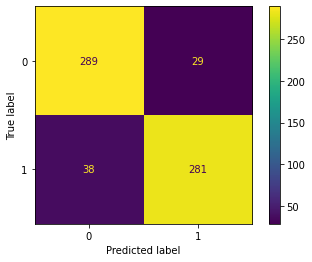

In [28]:
acc_moons2 = accuracy_score(y_test2, y_pred_moons2)
cm_moons2 = confusion_matrix(y_test2, y_pred_moons2)
disp_moons2 = ConfusionMatrixDisplay(confusion_matrix=cm_moons2)
disp_moons2.plot()


sensitivity_moons2 = recall_score(y_test2, y_pred_moons2)
specificity_moons2 = cm_moons2[0][0]/(cm_moons2[0][0]+cm_moons2[0][1])

acc_moons2

In [29]:
print('zbiór make_classification:')
print('własna implementacja:')
print('accuracy:',acc1)
print('sensitivity:',sensitivity)
print('specificity:',specificity)
print('\n')
print('implementacja z sklearn:')
print('accuracy:', acc2)
print('sensitivity:',sensitivity2)
print('specificity:',specificity2)
print('\n')
print('zbiór make_moons:')
print('własna implementacja:')
print('accuracy:',acc_moons)
print('sensitivity:',sensitivity_moons)
print('specificity:',specificity_moons)
print('\n')
print('implementacja z sklearn:')
print('accuracy:', acc_moons2)
print('sensitivity:',sensitivity_moons2)
print('specificity:',specificity_moons2)
print('\n')

zbiór make_classification:
własna implementacja:
accuracy: 0.8571428571428571
sensitivity: 0.9404388714733543
specificity: 0.7735849056603774


implementacja z sklearn:
accuracy: 0.8932496075353218
sensitivity: 0.8934169278996865
specificity: 0.8930817610062893


zbiór make_moons:
własna implementacja:
accuracy: 0.8681318681318682
sensitivity: 0.8307210031347962
specificity: 0.9056603773584906


implementacja z sklearn:
accuracy: 0.8948194662480377
sensitivity: 0.8808777429467085
specificity: 0.9088050314465409




Na zbiorze make_classification klasyfikator z sklearn radzi sobie lepiej pod względem accuracy. Jednakże, własna implementacja radzi sobie lepiej z klasyfikacją pozytywnych przypadków. Implementacja z sklearn radzi sobie lepiej z klasyfikacją negatywnych przypadków ze zbioru make_classification.

Na ziobrze make_moons lepiej radzi sobie klasyfikator z sklearn. Ma lepsze accuracy, specificity oraz sensitivity.

In [30]:
start1 = time.time()
cl_time = LogisticRegressionImplementation()
for i in range(100):
    cl_time.fit(x_train1, y_train1, n_iter=200)
    cl_time.predict(x_test1)
end1 = time.time()
print('czas wykonania dla własnej implementacji i 200 iteracji:', end1-start1)

0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.5846201034880085
0 : 0.58462

In [31]:
start2 = time.time()
cl_time2 = LogisticRegression()
for i in range(100):
    cl_time2.fit(x_train1, y_train1)
    cl_time2.predict(x_test1)
end2 = time.time()
print('czas wykonania dla implementacji z sklearn:', end2-start2)

czas wykonania dla implementacji z sklearn: 0.20841121673583984


Implementacja z sklearn jest znacznie szybsza.

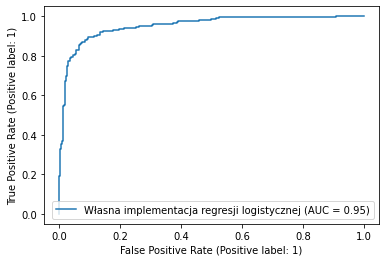

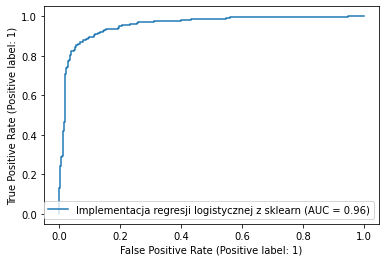

In [32]:
x_test1_auc = np.concatenate([np.ones((len(x_test1), 1)), x_test1], axis=1)

y_roc_i = [LogisticRegressionImplementation.logit(i, log.w) for i in x_test1_auc]
y_roc_s = log_s.decision_function(x_test1)

fpr_i, tpr_i, tresholds_i = roc_curve(y_test1, y_roc_i)
fpr_s, tpr_s, tresholds_s = roc_curve(y_test1, y_roc_s)
auc_i = auc(fpr_i, tpr_i)
auc_s = auc(fpr_s, tpr_s)

display_i = RocCurveDisplay(fpr=fpr_i, tpr=tpr_i, roc_auc=auc_i, estimator_name='Własna implementacja regresji logistycznej', pos_label=1)
display_s = RocCurveDisplay(fpr=fpr_s, tpr=tpr_s, roc_auc=auc_s, estimator_name='Implementacja regresji logistycznej z sklearn', pos_label=1)
display_i.plot()
display_s.plot()
plt.show()

Implementacja regresji logistycznej z sklearn uzyskała wyższy wynik AUC na zbiorze make_classification.

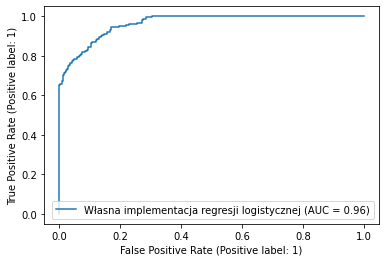

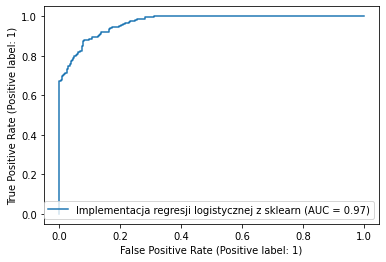

In [33]:
x_test2_auc = np.concatenate([np.ones((len(x_test2), 1)), x_test2], axis=1)

y_roc_i = [LogisticRegressionImplementation.logit(i, log_moons.w) for i in x_test2_auc]
y_roc_s = log_moons_sk.decision_function(x_test2)

fpr_i, tpr_i, tresholds_i = roc_curve(y_test2, y_roc_i)
fpr_s, tpr_s, tresholds_s = roc_curve(y_test2, y_roc_s)
auc_i = auc(fpr_i, tpr_i)
auc_s = auc(fpr_s, tpr_s)

display_i = RocCurveDisplay(fpr=fpr_i, tpr=tpr_i, roc_auc=auc_i, estimator_name='Własna implementacja regresji logistycznej', pos_label=1)
display_s = RocCurveDisplay(fpr=fpr_s, tpr=tpr_s, roc_auc=auc_s, estimator_name='Implementacja regresji logistycznej z sklearn', pos_label=1)
display_i.plot()
display_s.plot()
plt.show()

Implementacja regresji logistycznej z sklearn otrzymała lepszy wynik dla AUC na zbiorze make_moons. 

In [34]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

X, Y = np.meshgrid(x,y)


Z = []

for i in range(len(X)):
    for j in range(len(Y)):
        Z.append(1 if LogisticRegressionImplementation.logit([1,X[i,j], Y[i,j]], log.w) >= 0.5 else 0)
        
        
Z = np.reshape(Z, X.shape)

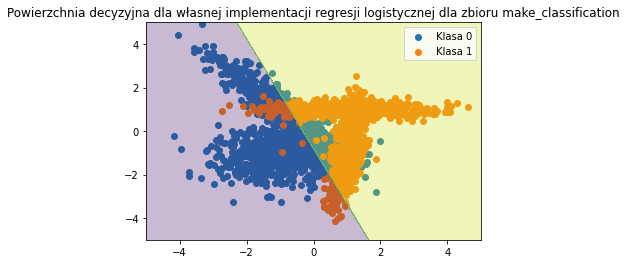

In [35]:
plt.scatter(x1[:,0][y1==0], x1[:,1][y1==0], label='Klasa 0')
plt.scatter(x1[:,0][y1==1], x1[:,1][y1==1], label='Klasa 1')
plt.legend()
plt.contourf(X, Y, Z, alpha=0.3)
plt.title('Powierzchnia decyzyjna dla własnej implementacji regresji logistycznej dla zbioru make_classification')
plt.show()

In [36]:
Z_s = []

for i in range(len(X)):
    for j in range(len(Y)):
        Z_s.append(log_s.predict([[X[i,j], Y[i,j]]]))
        
        
Z_s = np.reshape(Z_s, X.shape)

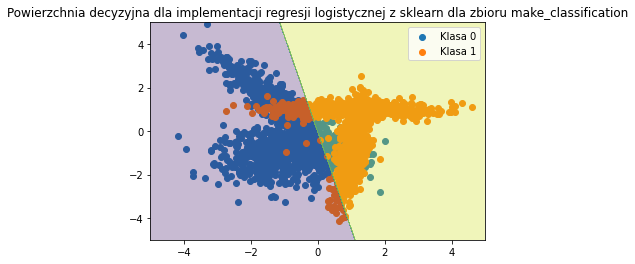

In [37]:
plt.scatter(x1[:,0][y1==0], x1[:,1][y1==0], label='Klasa 0')
plt.scatter(x1[:,0][y1==1], x1[:,1][y1==1], label='Klasa 1')
plt.legend()
plt.contourf(X, Y, Z_s, alpha=0.3)
plt.title('Powierzchnia decyzyjna dla implementacji regresji logistycznej z sklearn dla zbioru make_classification')
plt.show()

In [38]:
Z_moons = []

for i in range(len(X)):
    for j in range(len(Y)):
        Z_moons.append(1 if LogisticRegressionImplementation.logit([1,X[i,j], Y[i,j]], log_moons.w) >= 0.5 else 0)
        
Z_moons = np.reshape(Z_moons, X.shape)

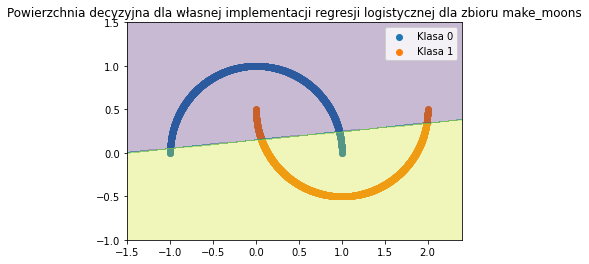

In [39]:
plt.scatter(x2[:,0][y2==0], x2[:,1][y2==0], label='Klasa 0')
plt.scatter(x2[:,0][y2==1], x2[:,1][y2==1], label='Klasa 1')
plt.legend()
plt.contourf(X, Y, Z_moons, alpha=0.3)
plt.title('Powierzchnia decyzyjna dla własnej implementacji regresji logistycznej dla zbioru make_moons')
plt.xlim(-1.5, 2.4)
plt.ylim(-1, 1.5)
plt.show()

In [40]:
Z_moons2 = []

for i in range(len(X)):
    for j in range(len(Y)):
        Z_moons2.append(log_moons_sk.predict([[X[i,j], Y[i,j]]]))
        
Z_moons2 = np.reshape(Z_moons2, X.shape)

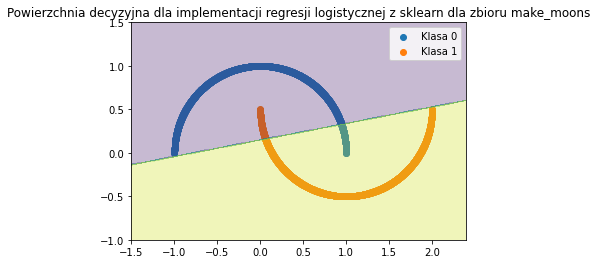

In [41]:
plt.scatter(x2[:,0][y2==0], x2[:,1][y2==0], label='Klasa 0')
plt.scatter(x2[:,0][y2==1], x2[:,1][y2==1], label='Klasa 1')
plt.legend()
plt.contourf(X, Y, Z_moons2, alpha=0.3)
plt.title('Powierzchnia decyzyjna dla implementacji regresji logistycznej z sklearn dla zbioru make_moons')
plt.xlim(-1.5, 2.4)
plt.ylim(-1, 1.5)
plt.show()

## Preprocessing zbioru Rain in Australia

In [ ]:
zbior = pd.read_csv(r"weatherAUS.csv")
zbior

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [43]:
n = len(zbior)

for i in zbior.columns:
    nans = zbior[i].isna().sum()
    print(f"{i}: {nans/n*100:.2f}% braków")

Date: 0.00% braków
Location: 0.00% braków
MinTemp: 1.02% braków
MaxTemp: 0.87% braków
Rainfall: 2.24% braków
Evaporation: 43.17% braków
Sunshine: 48.01% braków
WindGustDir: 7.10% braków
WindGustSpeed: 7.06% braków
WindDir9am: 7.26% braków
WindDir3pm: 2.91% braków
WindSpeed9am: 1.21% braków
WindSpeed3pm: 2.11% braków
Humidity9am: 1.82% braków
Humidity3pm: 3.10% braków
Pressure9am: 10.36% braków
Pressure3pm: 10.33% braków
Cloud9am: 38.42% braków
Cloud3pm: 40.81% braków
Temp9am: 1.21% braków
Temp3pm: 2.48% braków
RainToday: 2.24% braków
RainTomorrow: 2.25% braków


Zatem do kolumnami do usunięcia są: Evaporation, Sunshine, Cloud9am oraz Cloud3pm.

In [44]:
zbior_processed = zbior.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])
zbior_processed

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [45]:
x = zbior_processed.drop(columns='RainTomorrow')
y = zbior_processed['RainTomorrow']

In [46]:
x

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No


Zmienne kategoryczne: WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow

Zmienne numeryczne: MinTemp, MaxTemp, Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm 

Wypełnianie danych numerycznych średnią.

In [47]:
numerical = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

for col in numerical:
    x[col].fillna(x[col].mean(), inplace=True)

Wypełnianie danych kategorycznych medianą.

In [48]:
categorical = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for col in categorical:
    x[col] = x[col].fillna(x[col].mode()[0], inplace=False)

In [49]:
y.fillna(y.mode()[0], inplace=True)

Winsoryzacja wartości

In [50]:
Q1 = np.quantile(x[numerical], 0.25, axis=0)
Q2 = np.quantile(x[numerical], 0.5, axis=0)
Q3 = np.quantile(x[numerical], 0.75, axis=0)


IQR = Q3-Q1
IQR

array([ 9.1, 10.2,  1. , 15. , 12. , 11. , 26. , 28. ,  8.3,  8.3,  9.2,
        9.5])

In [51]:
lower_limit = Q2-1.5*IQR
upper_limit = Q2+1.5*IQR

In [52]:
for i in range(len(numerical)):
    x[numerical[i]] = np.clip(x[numerical[i]], lower_limit[i], upper_limit[i])

Kodowanie one-hot zmiennych kategorycznych

Zamiana zmiennej data na sam miesiąc, aby można jej było użyć w modelu.

In [53]:
x['Month'] = x['Date'].apply(lambda x: x[5:7])
x

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Month
0,2008-12-01,Albury,13.4,22.900000,0.6,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,12
1,2008-12-02,Albury,7.4,25.100000,0.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,12
2,2008-12-03,Albury,12.9,25.700000,0.0,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,12
3,2008-12-04,Albury,9.2,28.000000,0.0,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,12
4,2008-12-05,Albury,17.5,32.300000,1.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,06
145456,2017-06-22,Uluru,3.6,25.300000,0.0,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,06
145457,2017-06-23,Uluru,5.4,26.900000,0.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,06
145458,2017-06-24,Uluru,7.8,27.000000,0.0,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,06


In [54]:
x_encoded = pd.get_dummies(x, columns=categorical+['Month'], drop_first=True)

In [55]:
y_encoded = pd.get_dummies(y)
y_encoded.drop(columns='No', inplace=True)

In [56]:
y_encoded.value_counts()

Yes
0      113583
1       31877
dtype: int64

Podział danych na zbiór testowy i treningowy ze stratyfikacją

In [57]:
podzial_train = dict()
podzial_test = dict()

for loc in x_encoded['Location'].unique():
    x_train, x_test, y_train, y_test = train_test_split(x_encoded[x_encoded['Location']==loc], y_encoded[x_encoded['Location']==loc], random_state=254448, stratify=y_encoded[x_encoded['Location']==loc])
    podzial_train[loc] = [x_train.drop(columns=['Location', 'Date']), y_train]
    podzial_test[loc] = [x_test.drop(columns=['Location', 'Date']), y_test]
    


Normalizacja danych

In [58]:
for loc in x_encoded['Location'].unique():
    min_max_scaler = MinMaxScaler()
    podzial_train[loc][0] = min_max_scaler.fit_transform(podzial_train[loc][0])
    podzial_test[loc][0] = min_max_scaler.transform(podzial_test[loc][0])

Nauka klasyfikatorów

In [59]:
podzial_log = dict()
recall_list = []
acc_list = []
balanced = []

for loc in x_encoded['Location'].unique():
    log_locations = LogisticRegression(random_state=254448)
    log_locations.fit(podzial_train[loc][0], podzial_train[loc][1])
    podzial_log[loc] = log_locations
    y_pred_loc = log_locations.predict(podzial_test[loc][0])
    acc_list.append([loc, accuracy_score(podzial_test[loc][1], y_pred_loc)])
    recall_list.append([loc, recall_score(podzial_test[loc][1], y_pred_loc)])
    balanced.append([loc, balanced_accuracy_score(podzial_test[loc][1], y_pred_loc)])
    #print(loc, ':', accuracy_score(podzial_test[loc][1], y_pred_loc))
    
acc_list.sort(key=lambda x: x[1], reverse=True)
acc_list[0]


['Uluru', 0.9417721518987342]

In [60]:
recall_list.sort(key=lambda x: x[1], reverse=True)
recall_list[0]

['Witchcliffe', 0.740909090909091]

In [61]:
balanced.sort(key=lambda x: x[1], reverse=True)
balanced[0]

['Witchcliffe', 0.8404357837284666]

Najwyższy wskaźnik balanced accuracy na zbiorze uzyskał klasyfikator nauczony na danych pogodowych z Witchcliffe.

### Porównanie własnej implementacji dla danych pogodowych z Witchcliffe.

In [62]:
log_reg_witch = LogisticRegressionImplementation()
x_locc = podzial_train['Witchcliffe'][0]
y_locc = podzial_train['Witchcliffe'][1]
log_reg_witch.fit(x_locc, y_locc['Yes'].values.tolist(), error=0.682)

0 : 7.520643278978894
10000 : 7.51203807250399
20000 : 7.503440539698767
30000 : 7.494652522734828
40000 : 7.485845089318089
50000 : 7.476885040023678
60000 : 7.4678042714752095
70000 : 7.458639740636438
80000 : 7.449305205190621
90000 : 7.439896885309437
100000 : 7.430341769515616
110000 : 7.420735916022155
120000 : 7.4109150662423895
130000 : 7.401020710812999
140000 : 7.390983446830455
150000 : 7.380740916955445
160000 : 7.370423049472801
170000 : 7.359924360909308
180000 : 7.349352387429433
190000 : 7.338518319929419
200000 : 7.327625612794141
210000 : 7.316528225473641
220000 : 7.305188659737308
230000 : 7.293753673458672
240000 : 7.282074032461378
250000 : 7.270321150176987
260000 : 7.258273211836362
270000 : 7.246117860525322
280000 : 7.2337163898050045
290000 : 7.221036198712174
300000 : 7.208219478564454
310000 : 7.1950743940470785
320000 : 7.18182884912189
330000 : 7.168210233331677
340000 : 7.154465584080852
350000 : 7.140418019919273
360000 : 7.126041958476894
370000 : 7.11

array([-1.78697914, -0.21902419, -0.19056279,  0.2919831 , -0.12955231,
       -0.0940545 , -0.30234245, -0.48162826, -0.31887876, -0.6476205 ,
       -0.70467454, -0.27833534, -0.28917693,  0.90277633,  0.92051553,
        0.83905114,  0.93880867,  0.9147055 ,  1.00544517,  0.97793082,
        0.68876145,  0.79031342,  0.28580829,  0.77618308,  0.79079848,
        0.80626812,  0.8980519 ,  0.83554559,  0.84428998,  0.74177816,
        0.66543174,  0.88520767,  0.89049768,  0.9815212 ,  0.9774189 ,
        0.82651946,  0.59529663,  0.78853674,  0.8475569 ,  0.86665477,
        0.94342375,  0.95499348,  0.92536282,  0.93877212,  0.90665703,
        0.95969795,  0.95628888,  0.92298261,  0.98127756,  0.96576429,
        0.69158619,  0.75497366,  0.30759192,  0.74296226,  0.74046376,
        0.82020827,  0.91652085,  0.79457021,  0.43498   ,  0.79627158,
        0.74693095,  0.78500423,  0.73984607,  0.83405436,  0.87642433,
        0.84646733,  0.81110316,  0.77634077,  0.73075282,  0.75

In [63]:
x_testtt = podzial_test['Witchcliffe'][0]
y_pred_witch_i = log_reg_witch.predict(x_testtt)

In [64]:
print('accuracy score dla własnej implementacji regresji logistycznej dla danych z Witchcliffe:')
accuracy_score(y_pred_witch_i, podzial_test['Witchcliffe'][1])

accuracy score dla własnej implementacji regresji logistycznej dla danych z Witchcliffe:


0.8233731739707836

In [65]:
recall_score(y_pred_witch_i, podzial_test['Witchcliffe'][1])

0.7101449275362319

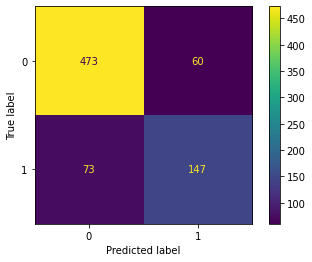

In [66]:
cm_witch = confusion_matrix(podzial_test['Witchcliffe'][1], y_pred_witch_i)
disp_witch = ConfusionMatrixDisplay(confusion_matrix=cm_witch)
disp_witch.plot()

specificity_witch = cm_witch[0][0]/(cm_witch[0][0]+cm_witch[0][1])

In [67]:
balanced_accuracy_score(podzial_test['Witchcliffe'][1], y_pred_witch_i)

0.7778057308545114

Klasyfikator z sklearn lepiej radzi sobie z klasyfikacją na zbiorze pogody z Witchcliffe niż własna implementacja regresji logistycznej.

## Skuteczność modeli regionalnych na krajowym zbiorze testowym

### Tworzenie krajowego zbioru testowego

In [68]:
krajowy_zbior_x = podzial_test['Albury'][0]
krajowy_zbior_y = podzial_test['Albury'][1]

for loc in podzial_test.keys():
    if loc == 'Albury':
        continue
    krajowy_zbior_x = np.vstack( (krajowy_zbior_x, podzial_test[loc][0]) )
    krajowy_zbior_y = np.vstack( (krajowy_zbior_y, podzial_test[loc][1]) )

### Testowanie modeli regionalnych

In [69]:
glob_acc = []
glob_balanced = []
glob_recall = []

for loc in podzial_test.keys():
    predykcje = podzial_log[loc].predict(krajowy_zbior_x)
    glob_acc.append([loc, accuracy_score(krajowy_zbior_y, predykcje)])
    glob_recall.append([loc, recall_score(krajowy_zbior_y, predykcje)])
    glob_balanced.append([loc, balanced_accuracy_score(krajowy_zbior_y, predykcje)])
    
    
glob_acc.sort(key=lambda x: x[1], reverse=True)
glob_acc[0]

['BadgerysCreek', 0.82997141914917]

In [70]:
glob_recall.sort(key=lambda x: x[1], reverse=True)
glob_recall[0]

['NorfolkIsland', 0.6504075235109718]

In [71]:
glob_balanced.sort(key=lambda x: x[1], reverse=True)
glob_balanced[0]

['Sydney', 0.7303125936767653]

Na zbiorze krajowym najlepiej poradził sobie klasyfikator lokalny trenowany na zbiorze pogody z regionu Sydney. Jest to model, który nie osiągnął najwyższej skuteczności lokalnej na zbiorze danych dla swojego regionu.

In [72]:
log_sid = podzial_log['Sydney']

y_pred_sid = log_sid.predict(krajowy_zbior_x)
accuracy_score(krajowy_zbior_y, y_pred_sid)

0.8018852368912829

In [73]:
recall_score(krajowy_zbior_y, y_pred_sid)

0.602884012539185

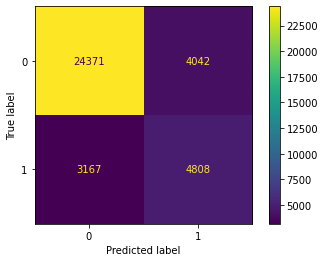

In [74]:
cm_sid = confusion_matrix(krajowy_zbior_y, y_pred_sid)
disp_sid = ConfusionMatrixDisplay(confusion_matrix=cm_sid)
disp_sid.plot()
plt.show()

### Wyniki dla DummyClassifier

In [75]:
dummy = DummyClassifier()
dummy.fit(podzial_train['Sydney'][0], podzial_train['Sydney'][1])
y_pred_dummy = dummy.predict(krajowy_zbior_x)
accuracy_score(krajowy_zbior_y, y_pred_dummy)

0.7808343409915357

In [76]:
recall_score(krajowy_zbior_y, y_pred_dummy)

0.0

In [77]:
balanced_accuracy_score(krajowy_zbior_y, y_pred_dummy)

0.5

Możemy zauważyć, że accuracy dla DummyClassifier jest bliskie accuracy dla klasyfikatora trenowanego na zbiorze z regionu Sydney. Wskazuje to, że DummyClassifier jest tylko niewiele gorszy od regresji logistycznej. Jest tak, ponieważ zbiór danych nie jest zbilansowany. Jednakże, regresja liniowa ma znacznie lepszy recall, a więc i również balanced_accuracy_score.

Budowanie modelu w oparciu o dane fragmentaryczne nie jest dobrym sposobem zmniejszenia wymaganej ilości danych uczących, ponieważ nie zawsze dane lokalne nie zawsze dobrze reprezentują zbiór 'globalny'.